In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# These are XOR inputs
x = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# These are XOR outputs
y = np.array([[0, 1, 1, 0]])

In [3]:
x
y

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

array([[0, 1, 1, 0]])

In [4]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(2, 4)
y.shape=(1, 4)


In [5]:
# Number of inputs
n_x = 2

# Number of neurons in output layer
n_y = 1

# Number of neurons in hidden layer
n_h = 2

In [6]:
# Total training examples
m = x.shape[1]

In [7]:
# Learning rate
lr = 0.5

# Define random seed for consistent results
np.random.seed(2)

In [8]:
# Define weight matrices for neural network
w1 = np.random.rand(n_h, n_x)   # Weight matrix for hidden layer
w2 = np.random.rand(n_y, n_h)   # Weight matrix for output layer

# I didn't use bias units

In [9]:
w1
w2

array([[0.4359949 , 0.02592623],
       [0.54966248, 0.43532239]])

array([[0.4203678 , 0.33033482]])

In [10]:
# generates random numbers from a uniform distribution over the range [0, 1).
np.random.rand()
np.random.rand(5)
np.random.rand(2, 5)
np.random.rand(2, 3, 5)

0.2046486340378425

array([0.61927097, 0.29965467, 0.26682728, 0.62113383, 0.52914209])

array([[0.13457995, 0.51357812, 0.18443987, 0.78533515, 0.85397529],
       [0.49423684, 0.84656149, 0.07964548, 0.50524609, 0.0652865 ]])

array([[[0.42812233, 0.09653092, 0.12715997, 0.59674531, 0.226012  ],
        [0.10694568, 0.22030621, 0.34982629, 0.46778748, 0.20174323],
        [0.64040673, 0.48306984, 0.50523672, 0.38689265, 0.79363745]],

       [[0.58000418, 0.1622986 , 0.70075235, 0.96455108, 0.50000836],
        [0.88952006, 0.34161365, 0.56714413, 0.42754596, 0.43674726],
        [0.77655918, 0.53560417, 0.95374223, 0.54420816, 0.08209492]]])

In [11]:
# We will use this list to accumulate losses
losses = []

In [12]:
# I used sigmoid activation function for hidden layer and output
def sigmoid(z):
  z = 1/(1+np.exp(-z))
  return z

In [13]:
# Forward propagation
def forward_prop(w1, w2, x):
  z1 = np.dot(w1, x)
  a1 = sigmoid(z1)

  z2 = np.dot(w2, a1)
  a2 = sigmoid(z2)
  return z1, a1, z2, a2

In [14]:
# Backward propagation
def back_prop(m, w1, w2, z1, a1, z2, a2, y):
  dz2 = a2-y
  dw2 = np.dot(dz2, a1.T)/m

  dz1 = np.dot(w2.T, dz2) * a1 * (1-a1)
  dw1 = np.dot(dz1, x.T)/m

  dw1 = np.reshape(dw1, w1.shape)
  dw2 = np.reshape(dw2, w2.shape)

  return dz2, dw2, dz1, dw1

In [15]:
lr = 0.9

In [16]:
def binary_cross_entropy_loss(y, a2):
  m = len(y)
  loss = -(1/m) * np.sum(y * np.log(a2) + (1 - y) * np.log(1 - a2))
  return loss

In [17]:
def mse_loss(y_true, y_pred):
  return np.mean(np.square(y_true - y_pred))

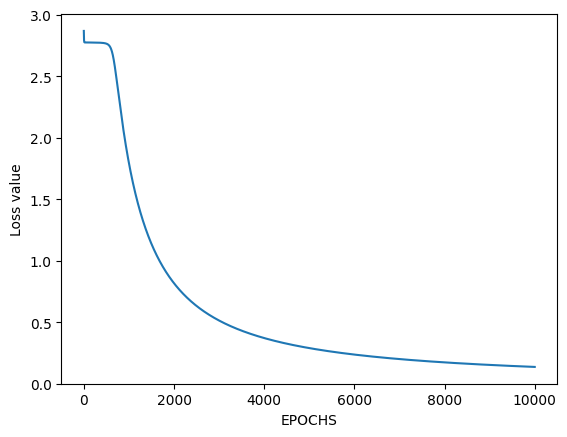

In [18]:
iterations = 10000
for i in range(iterations):
  z1, a1, z2, a2 = forward_prop(w1, w2, x)

  loss = binary_cross_entropy_loss(y, a2)
  # loss = mse_loss(y, a2)

  losses.append(loss)

  da2, dw2, dz1, dw1 = back_prop(m, w1, w2, z1, a1, z2, a2, y)

  # Parameter updates
  w2 = w2-lr*dw2
  w1 = w1-lr*dw1

# We plot losses to see how our network is doing
_ = plt.plot(losses)
_ = plt.xlabel("EPOCHS")
_ = plt.ylabel("Loss value")

In [19]:
def predict(w1, w2, input):
  z1, a1, z2, a2 = forward_prop(w1, w2, input)

  # print(a2)
  # print(np.squeeze(a2))

  a2 = np.squeeze(a2) >= 0.5
  return a2

In [20]:
w1
w2

array([[0.89217306, 0.89217096],
       [8.17932504, 8.17746632]])

array([[-42.30248196,  33.38806983]])

In [21]:
x
[1 if x else 0 for x in predict(w1, w2, x)]

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

[0, 1, 1, 0]